In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob
import cmocean as cmo
import seawater as sw
import sys
import tkinter
from tkinter import filedialog

sys.path.append('../')
import src.data.export_log_data as efuncs
import src.data.read_functions as rfuncs

## SELECT THE INPUT DIRECTORY (SELECT THE FOLDER ENTITLED 'campaignxxx')
inputpath = filedialog.askdirectory()
logdir=os.path.join(inputpath,'files','log')


## SELECT THE OUTPUT DIRECTORY
savedir=os.path.join(inputpath,'files','processed-log-data')
os.makedirs(savedir, exist_ok=True) 

In [2]:
inputpath

'D:/KG-Trials-Day2'

In [3]:
# drive=os.path.join('x:/SONAR ARCHIVE','AUV','AUV Control Centre projects and data 2020','Skate Project Mission 1-Baited_data20-10-20')
# drive=os.path.join('x:/SONAR ARCHIVE','AUV','AUV Projects 2021')
# campaign='Skate Project Mission Baited May 2021'
# folder = 'files'
# subfolder='log'
# savefolder='processed-log-data'

# # root dir
# rootpath = os.path.dirname(os.getcwd())
# # log files directory
# logdir=os.path.join(drive,campaign,folder,subfolder)
# # save directory


In [4]:
logdir

'D:/KG-Trials-Day2\\files\\log'

In [5]:
## Umzip all the files (if not unzipped already)
## CTD data
files=glob.glob(logdir+'\*ctd*')# list files
if files:
# determine if files are zipped. If yes, unzip, if no, continue
    ctdfiles=os.path.join(logdir,'*ctd-slocum*.xml.gz')    
    import gzip, shutil
    flelist=glob.glob(ctdfiles)
    for i in flelist:
        xfle=os.path.splitext(i)[0]
        if not os.path.isfile(xfle):
            with gzip.open(i, 'r') as f_in, open( i[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

## SBP files
files=glob.glob(logdir+'\*sbp*')
if files:
    # determine if files are zipped. If yes, unzip, if no, continue
    files=os.path.join(logdir,'*sbp*.xml.gz')    
    import gzip, shutil
    flelist=glob.glob(files)
    for i in flelist:
        xfle=os.path.splitext(i)[0]
        if not os.path.isfile(xfle):
            with gzip.open(i, 'r') as f_in, open( i[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

## GPS files
files=glob.glob(logdir+'\*gps*')
if files:    
    # determine if files are zipped. If yes, unzip, if no, continue
    files=os.path.join(logdir,'*gps-*.xml.gz')    
    import gzip, shutil
    flelist=glob.glob(files)
    for i in flelist:
        xfle=os.path.splitext(i)[0]
        if not os.path.isfile(xfle):
            with gzip.open(i, 'r') as f_in, open( i[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

                
files=glob.glob(logdir+'\*nav*')
if files: 
# determine if files are zipped. If yes, unzip, if no, continue
    navfiles=os.path.join(logdir,'*navigator*.xml.gz')    
    import gzip, shutil
    flelist=glob.glob(navfiles)
    for i in flelist:
        xfle=os.path.splitext(i)[0]
        if not os.path.isfile(xfle):
            with gzip.open(i, 'r') as f_in, open( i[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

files=glob.glob(logdir+'\*aanderaa*')
# determine if files are zipped. If yes, unzip, if no, continue
if files: 
    files=os.path.join(logdir,'*aanderaa*.xml.gz')    
    import gzip, shutil
    flelist=glob.glob(files)
    for i in flelist:
        xfle=os.path.splitext(i)[0]
        if not os.path.isfile(xfle):
            with gzip.open(i, 'r') as f_in, open( i[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

files=glob.glob(logdir+'\*ecopuck-flntu*')
# determine if files are zipped. If yes, unzip, if no, continue
if files: 
    files=os.path.join(logdir,'*ecopuck-flntu*.xml.gz')    
    import gzip, shutil
    flelist=glob.glob(files)
    for i in flelist:
        xfle=os.path.splitext(i)[0]
        if not os.path.isfile(xfle):
            with gzip.open(i, 'r') as f_in, open( i[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
                

In [6]:
## create null values for datasets, so we can check for existence later
ctdf=pd.DataFrame()
sbpdf=pd.DataFrame()
gpdf=pd.DataFrame()
nvdf=pd.DataFrame()
aandf=pd.DataFrame()               
ecopuck=pd.DataFrame()

## CTD data

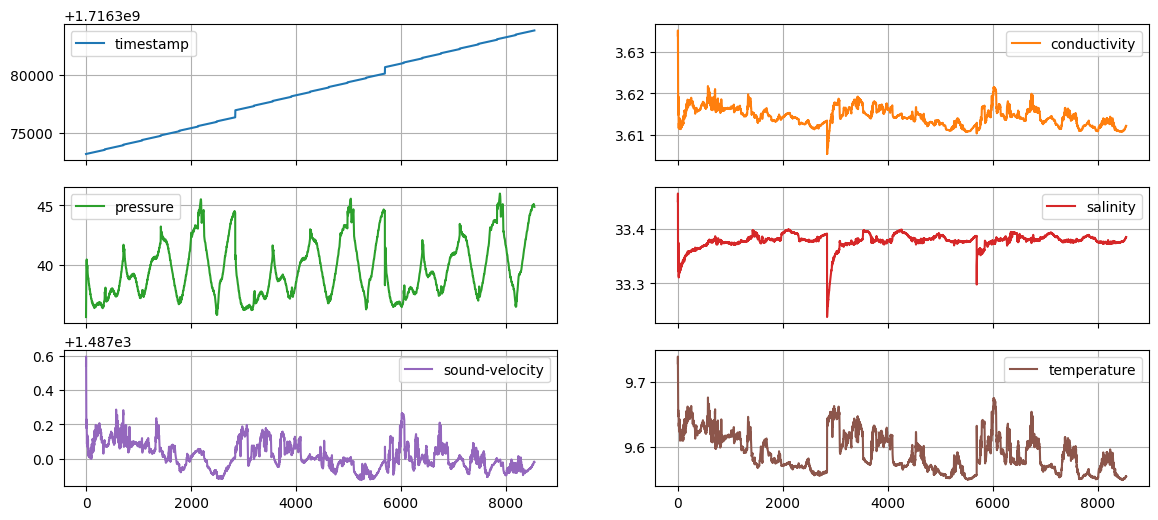

In [7]:
files=glob.glob(logdir+'\*ctd*')
if files:
# read CTD data and convert to .csv format, output to data/ctd-files/
    ctdf=rfuncs.readctdlog(logdir,savedir)
    ctdf.plot(subplots=True,
              layout=(3,2),
              figsize=[14,6],
              grid=True)

## SBP data

In [8]:
files=glob.glob(logdir+'\*sbp*')
if files:
    # read SBP data and convert to .csv format, output to data/sbp-files/
    sbpdf=rfuncs.readsbplog(logdir,savedir)

## GPS data

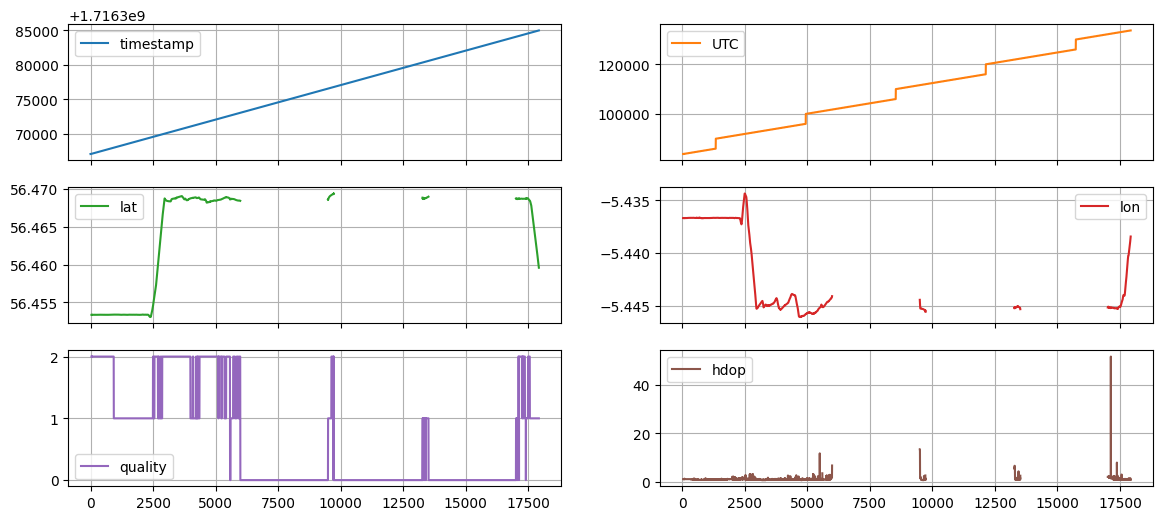

In [9]:
files=glob.glob(logdir+'\*gps*')
if files:    
    # read GPS data and convert to .csv format, output to data/gps-files/
    gpdf=rfuncs.readgpslog(logdir,savedir)
    gpdf=gpdf.drop(columns=[
     'build-number',
     'build-tag',
     'log-level',
     'rate',
     'sbf-remote-com-port',
     'sbf-local-com-port',
     'vsp-local-com-port',
     'corrections-local-com-port',
     'vsp-local-tcp-port',
     'corrections-local-udp-port',
     'vsp-enabled',
     'corrections-enabled',
     'sbf-enabled',
     'sbf-unicast-enabled',
     'sbf-unicast-port',
     'sbf-unicast-interface',
     'log-nmea',
     'log-messages',
     'multicast-receive-enabled',
     'multicast-receive-port',
     'multicast-receive-addr',
     'multicast-receive-interface',
     'messages-received',
     'raw-logged-bytes',
     'received-telnet-bytes',
     'sent-corr-bytes',
     'sent-corr-packets',
     'sent-telnet-bytes',
     'time-since-gga',
     'time-since-sent',
     'diff-age',
     'sats',
     'stnRef',
     'cogt',
     'lat-dev',
     'lon-dev',
     'sogk',
     'sogm'])
    gpdf.head()
    gpdf.plot(subplots=True,
          layout=(3,2),
          figsize=[14,6],
          grid=True)

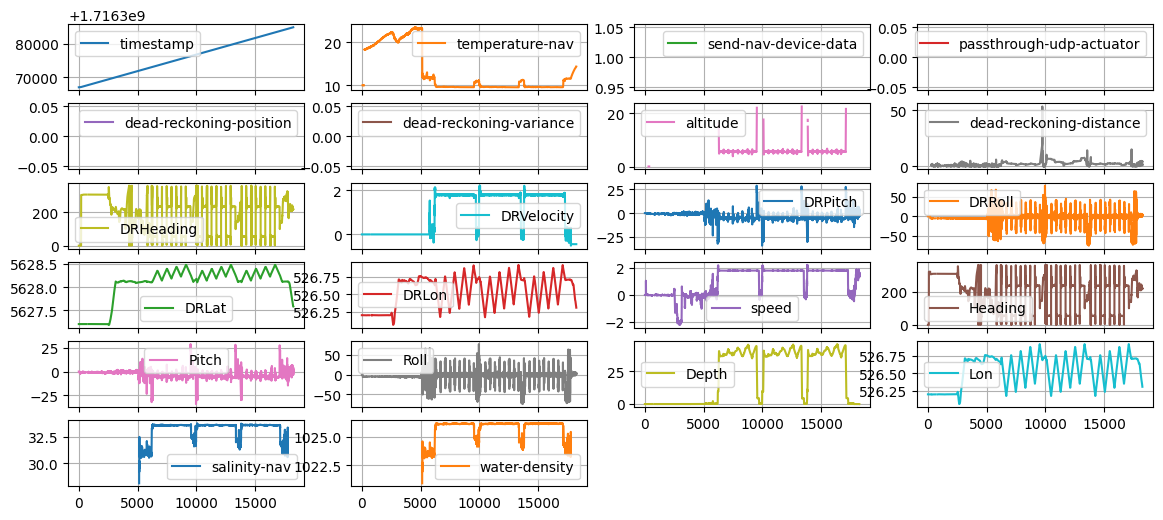

In [10]:
files=glob.glob(logdir+'\*nav*')
if files: 
    # read nav data and convert to .csv format, output to data/nav-files/
    nvdf=rfuncs.readnavlog(logdir,savedir)
    # drop unwanted variables form nav data
    nvdf=nvdf.drop(columns=[
         'magnetic-deviation',
         'pressure-warnings',
         'lat-lon-precision',
         'average-water-density',
         'sound-velocity',
         'center-actuators-on-idle',
         'dead-reckoning-orientation',
         'dead-reckoning-velocity',
         'orientation',
         'position',
         'variance',
         'velocity'])

    # rename duplicat variables (t,s, sv, from control module?
    nvdf=nvdf.rename(columns={"time": "time-nav",
                              "salinity": "salinity-nav",
                              "temperature": "temperature-nav",
                              "sound-velocity": "sound-velocity-nav"})
    nvdf.plot(subplots=True, 
               layout=(6,4),
               figsize=[14,6],
               grid=True)    

## Aanderra Optopde data

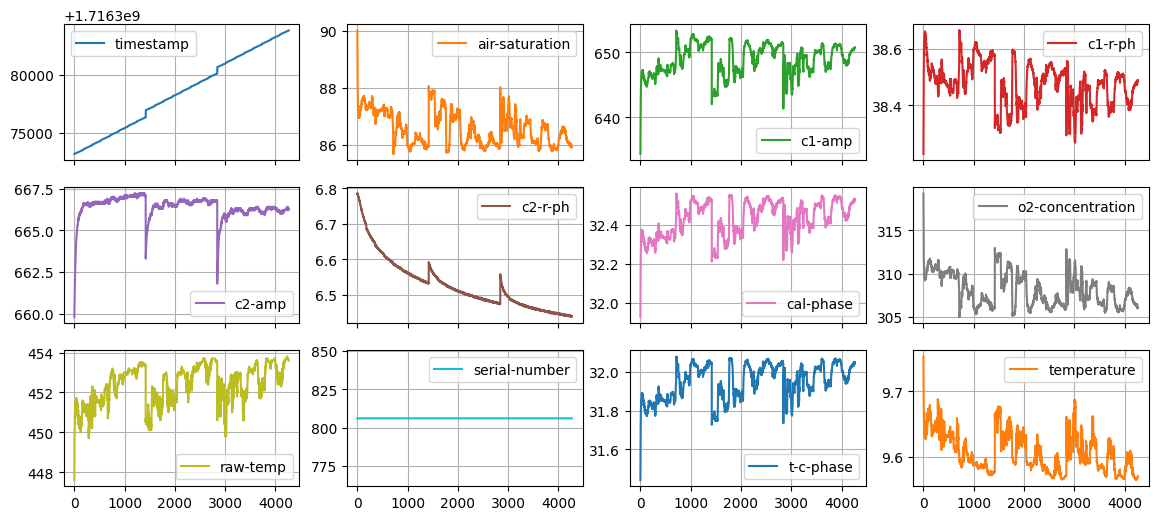

In [11]:
files=glob.glob(logdir+'\*aanderaa*')
if files: 
    # read aanderaa data and convert to .csv format, output to data/aanderaa-files/
    aandf=rfuncs.readaandlog(logdir,savedir)
    aandf.plot(subplots=True, 
               layout=(3,4),
               figsize=[14,6],
               grid=True)

## ecopuck data

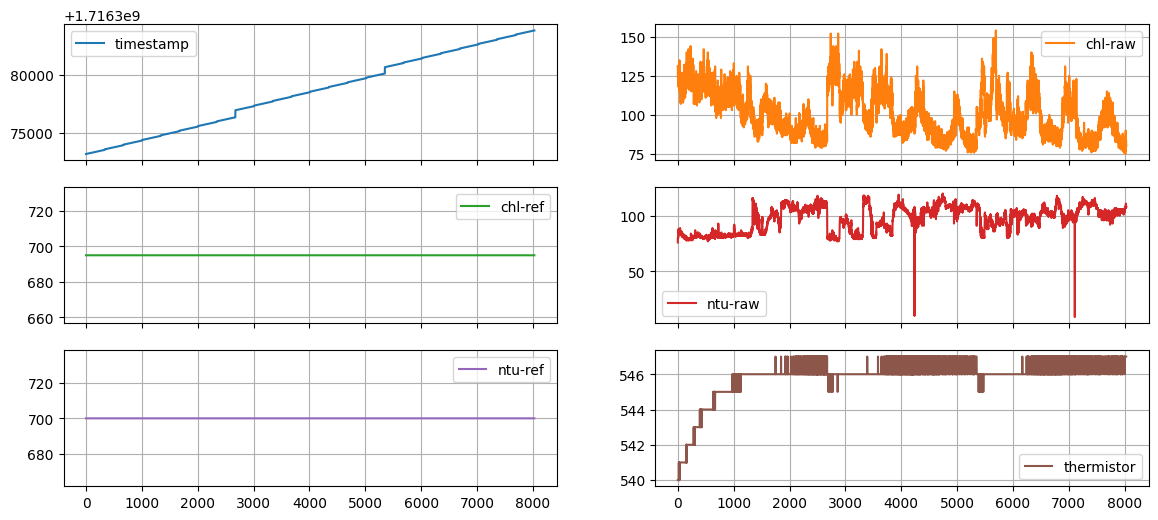

In [12]:
# Chlorophyll Scale Factor
# CHLDarkCounts=50
# CHLScaleFactor=0.0121
# CHLMaxOut=4130
# CHLRes=1

# CHL = CHLScaleFactor x (ecopuck.[chl-raw] - CHLDarkCounts)
# # Nephelometric Turbidity Unit
# NTUDarkCounts=51
# NTUSolutionValue=1784
# NTUScaleFactor=0.0249
# MaxOut=4130
# Res=1




files=glob.glob(logdir+'\*ecopuck*')
if files: 
    # read aanderaa data and convert to .csv format, output to data/aanderaa-files/
    ecopuck=rfuncs.readecolog(logdir,savedir)
    ecopuck.plot(subplots=True, 
                 layout=(3,2),
                 figsize=[14,6],
                 grid=True)

In [17]:
# Chlorophyll Scale Factor
CHLDarkCounts=50
CHLScaleFactor=0.0121
CHLMaxOut=4130
CHLRes=1
CHL = CHLScaleFactor*(ecopuck["chl-raw"]-CHLDarkCounts)

# Nephelometric Turbidity Unit
NTUDarkCounts=51
NTUSolutionValue=1784
NTUScaleFactor=0.0249
MaxOut=4130
Res=1
NTU = NTUScaleFactor*(ecopuck["ntu-raw"]-NTUDarkCounts)

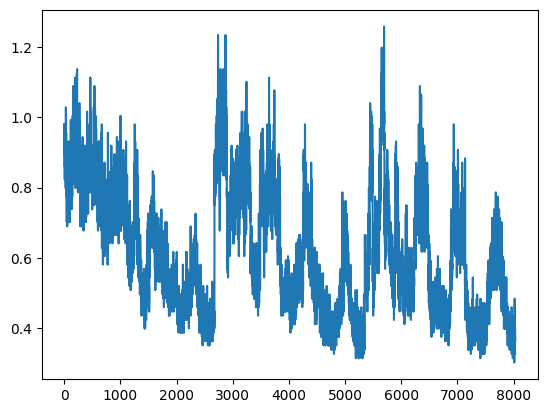

In [19]:
plt.plot(CHL)

In [13]:
# create merged file
## always gps and nav log to mege first to new df
# round timestamp to o decimal places ready for merging
nvdf=nvdf.round({'timestamp': 0})
gpdf=gpdf.round({'timestamp': 0})

auvmerge=pd.merge(nvdf, gpdf,how='outer',on='timestamp')

# ctd
if not ctdf.empty:
    ctdf=ctdf.round({'timestamp': 0})
    auvmerge=pd.merge(auvmerge, ctdf,how='outer',on='timestamp')

# aandera 
if not aandf.empty:
    aandf=aandf.round({'timestamp': 0})
    auvmerge=pd.merge(auvmerge, aandf,how='outer',on='timestamp')

# # ecopuck 
# if not ecopuck.empty:
#     ecopuck=ecopuck.round({'timestamp': 0})
#     auvmerge=pd.merge(auvmerge, ecopuck,how='outer',on='timestamp')

# sbp 
if not sbpdf.empty:
    print('to be done later, when we have some data')          

auvmerge.to_csv(os.path.join(savedir,'auvdata.csv')) 

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

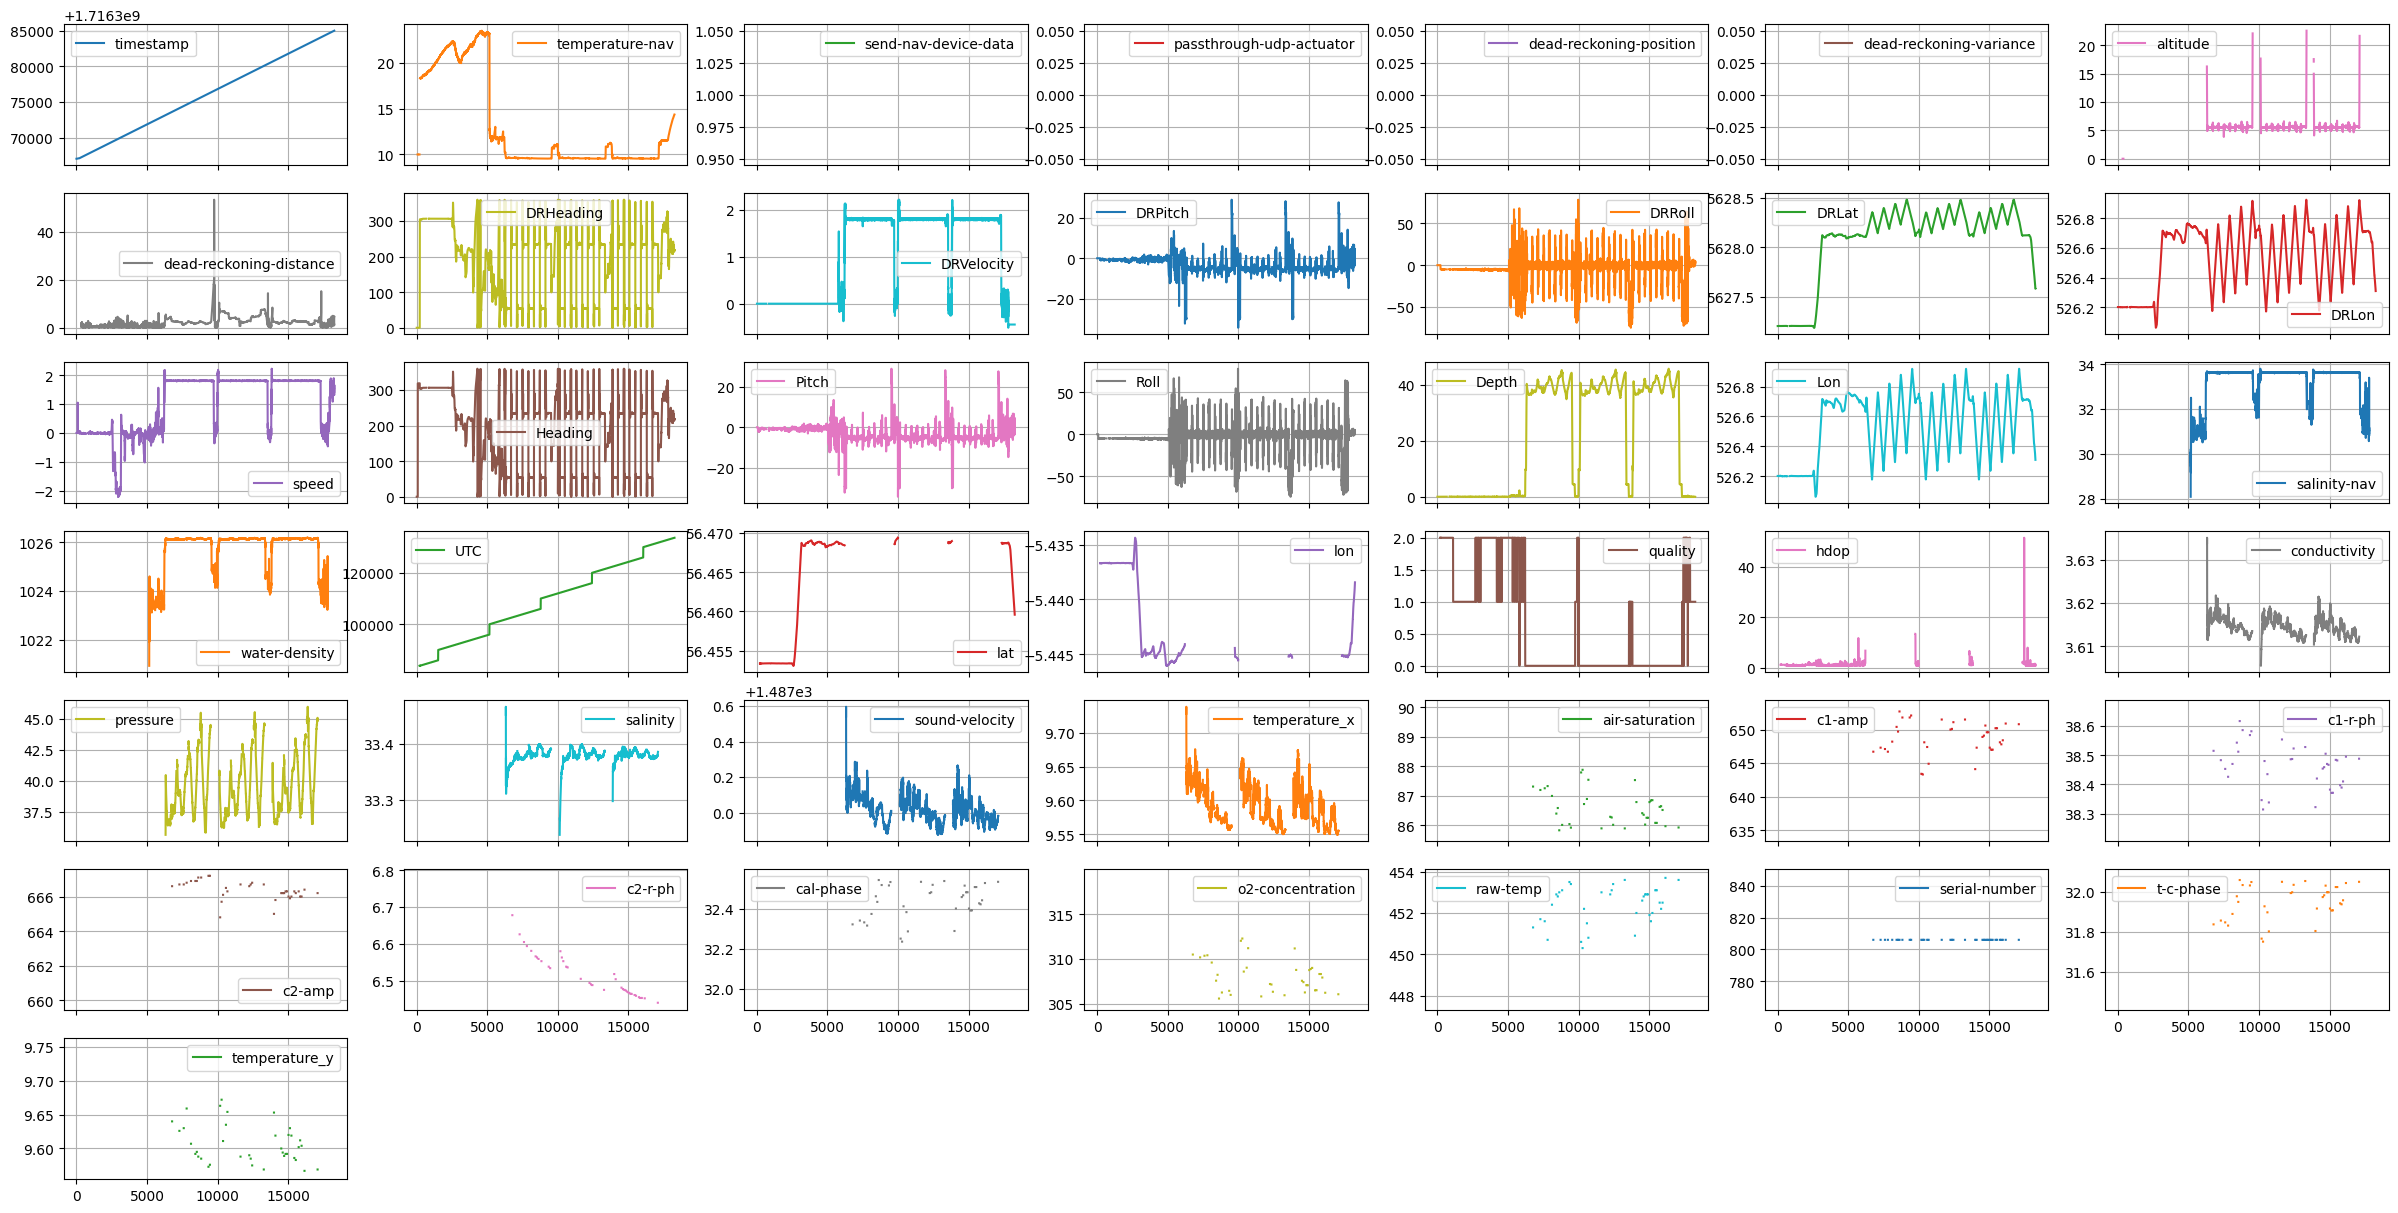

In [17]:
auvmerge.plot(subplots=True, 
                 layout=(7,7),
                 figsize=[30,15],
                 grid=True)